
## Web scraping and analysis

This Jupyter notebook includes some code to get started with web scraping. I will use a package called `BeautifulSoup` to collect the data from the web. Once data is collected and saved it into a local `.csv` file.

### Scraping data from Skytrax

Visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, I am only interested in reviews related to American Airlines itself.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
reviews =[]
stars =[]
date=[]
country =[]

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/american-airlines/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html.parser")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            star = item.span.text.strip()  # Strip leading/trailing whitespace
            star = star.replace("\t", "1")
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
    num_items = min(len(reviews), len(stars))
    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

In [ ]:
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
len(stars)

3535

In [ ]:
stars = stars[:3500]

In [ ]:
#create  a dataframe from these collected lists of data

df1 = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [ ]:
df1.head()

,reviews,stars,date,country
0,Not Verified | My 21 year old daughter broke h...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t2,14th March 2024,United States
1,✅ Trip Verified | I’ve had several negative e...,1,14th March 2024,United States
2,✅ Trip Verified | They are the worst airline ...,3,13th March 2024,United States
3,Not Verified | A disaster from start to finish...,1,13th March 2024,United States
4,"✅ Trip Verified | Worst airline ever, it was ...",1,13th March 2024,United States


In [ ]:
df1.shape

(3500, 4)

In [ ]:
df1.to_csv("BA_data.csv")

**DATA CLEANING**

In [ ]:
df1.head()

,reviews,stars,date,country
0,Not Verified | My 21 year old daughter broke h...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t2,14th March 2024,United States
1,✅ Trip Verified | I’ve had several negative e...,1,14th March 2024,United States
2,✅ Trip Verified | They are the worst airline ...,3,13th March 2024,United States
3,Not Verified | A disaster from start to finish...,1,13th March 2024,United States
4,"✅ Trip Verified | Worst airline ever, it was ...",1,13th March 2024,United States


In [ ]:
df1['verified'] = df1.reviews.str.contains("Trip Verified")

In [ ]:
df1['verified'].value_counts()

True     2066
False    1434
Name: verified, dtype: int64

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
lemma = WordNetLemmatizer()

Lemma =[]
reviews_data = df1.reviews.str.split('|',expand=True)[1]
#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', str(rev))
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    Lemma.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1['Lemma'] = Lemma

In [ ]:
df1.head()

,reviews,stars,date,country,verified,Lemma
0,Not Verified | My 21 year old daughter broke h...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t2,14th March 2024,United States,False,year old daughter broke foot mission trip arli...
1,✅ Trip Verified | I’ve had several negative e...,1,14th March 2024,United States,True,several negative experience airline losing che...
2,✅ Trip Verified | They are the worst airline ...,3,13th March 2024,United States,True,worst airline countless delay u board pm plane...
3,Not Verified | A disaster from start to finish...,1,13th March 2024,United States,False,disaster start finish first flight columbia ch...
4,"✅ Trip Verified | Worst airline ever, it was ...",1,13th March 2024,United States,True,worst airline ever dirty staff rude never fly ...


In [ ]:
df1.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
Lemma       object
dtype: object

In [ ]:
df1.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t2', '1', '3', '2', '10', '9', '4',
       '8', '6', '7', '5'], dtype=object)

In [ ]:
df1.stars = df1.stars.str.extract(r'(\d+)')

In [ ]:
df1.stars.value_counts()

1     2435
2      474
3      190
10     132
4       67
9       55
8       53
5       44
7       33
6       17
Name: stars, dtype: int64

In [ ]:
df1.drop(df1[df1.stars == "None"].index, axis=0, inplace=True)
df1.dropna(subset=['stars'], inplace =True)

In [ ]:
df1.drop(df1[df1.stars.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df1.stars.unique()

array(['2', '1', '3', '10', '9', '4', '8', '6', '7', '5'], dtype=object)

In [ ]:
df1.isnull().value_counts()

reviews  stars  date   country  verified  Lemma
False    False  False  False    False     False    3500
dtype: int64

In [ ]:
df1.drop(df1[df1.reviews.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df1.reviews.isnull().value_counts()

False    3500
Name: reviews, dtype: int64

**1255 customers given rating but not written any review** Not going to remove those reviews but will consider rating for analysis

In [ ]:
df1.reset_index(drop=True)

,reviews,stars,date,country,verified,Lemma
0,Not Verified | My 21 year old daughter broke h...,2,14th March 2024,United States,False,year old daughter broke foot mission trip arli...
1,✅ Trip Verified | I’ve had several negative e...,1,14th March 2024,United States,True,several negative experience airline losing che...
2,✅ Trip Verified | They are the worst airline ...,3,13th March 2024,United States,True,worst airline countless delay u board pm plane...
3,Not Verified | A disaster from start to finish...,1,13th March 2024,United States,False,disaster start finish first flight columbia ch...
4,"✅ Trip Verified | Worst airline ever, it was ...",1,13th March 2024,United States,True,worst airline ever dirty staff rude never fly ...
...,...,...,...,...,...,...
3495,Not Verified | Will not fly American again. F...,1,15th October 2018,United States,False,fly american flew friday bradley international...
3496,✅ Trip Verified | The worst airline I have dea...,1,15th October 2018,United States,True,worst airline dealt flight delayed hour send e...
3497,✅ Trip Verified | Norfolk to Philadelphia. Ch...,1,15th October 2018,United States,True,norfolk philadelphia charlotte american airlin...
3498,Not Verified | \r\nI will try not to ever fly...,2,15th October 2018,United States,False,try ever fly american airline say try sometime...


In [ ]:
df1.stars.value_counts()

1     2435
2      474
3      190
10     132
4       67
9       55
8       53
5       44
7       33
6       17
Name: stars, dtype: int64

In [ ]:
df1.to_csv("BA_cleaned.csv")

In [ ]:
df1.shape

(3500, 6)

In [ ]:
df1['stars']=pd.to_numeric(df1['stars'], errors='coerce')
df1.stars.mean()

2.0037142857142856

In [ ]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

#from wordcloud import WordCloud, STOPWORDS

Text(0.5, 0.98, 'Counts for each ratings')

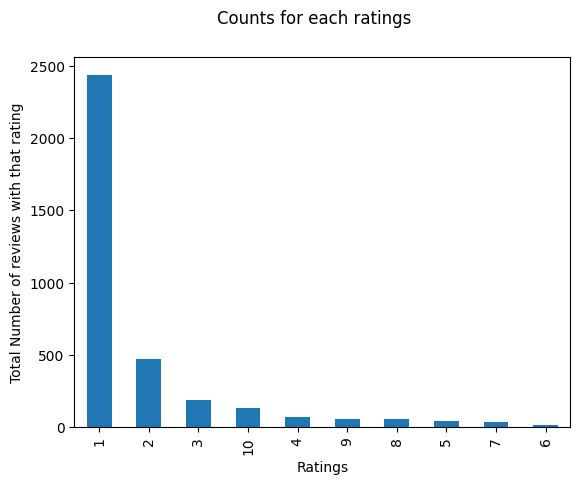

In [ ]:
df1.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df1_ratings = pd.DataFrame(df1.stars.value_counts())
percent_values = (df1_ratings.stars.values/ df1_ratings.stars.values.sum() *100).tolist()
percent_values = [round(x,2) for x in percent_values]
df1_ratings['percent_values'] = percent_values

In [ ]:
df1_ratings = df1_ratings.reset_index()

In [ ]:
df1_ratings.rename(columns = {'index':'stars','stars':'total_counts'}, inplace = True)
df1_ratings

,stars,total_counts,percent_values
0,1,2435,69.57
1,2,474,13.54
2,3,190,5.43
3,10,132,3.77
4,4,67,1.91
5,9,55,1.57
6,8,53,1.51
7,5,44,1.26
8,7,33,0.94
9,6,17,0.49


In [ ]:
df1.date = pd.to_datetime(df1.date)

In [ ]:
df1.date.head()

0   2024-03-14
1   2024-03-14
2   2024-03-13
3   2024-03-13
4   2024-03-13
Name: date, dtype: datetime64[ns]

In [ ]:
fig = px.line(df1, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
pip install wordcloud

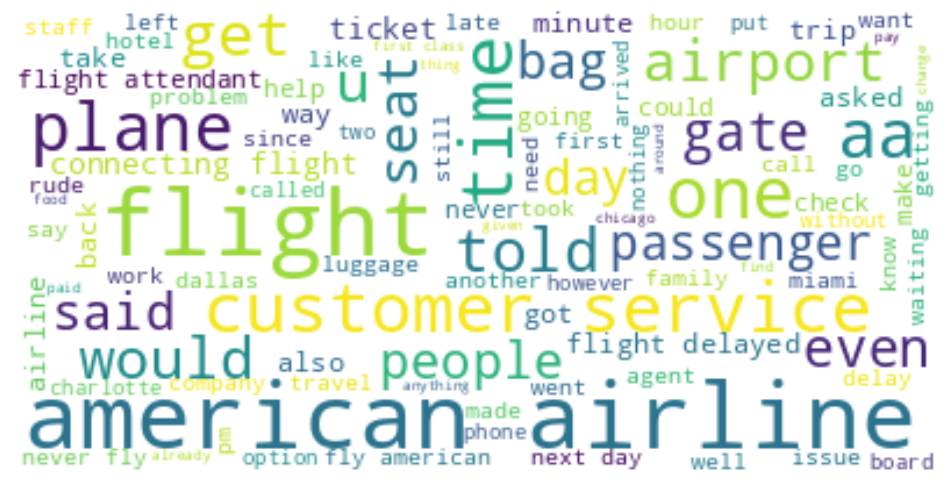

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Start with one review:
reviews = " ".join(df1.Lemma)
plt.figure(figsize=(12,12))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=200,width=400,max_font_size=40, max_words=100, stopwords=stopwords,background_color = 'white').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

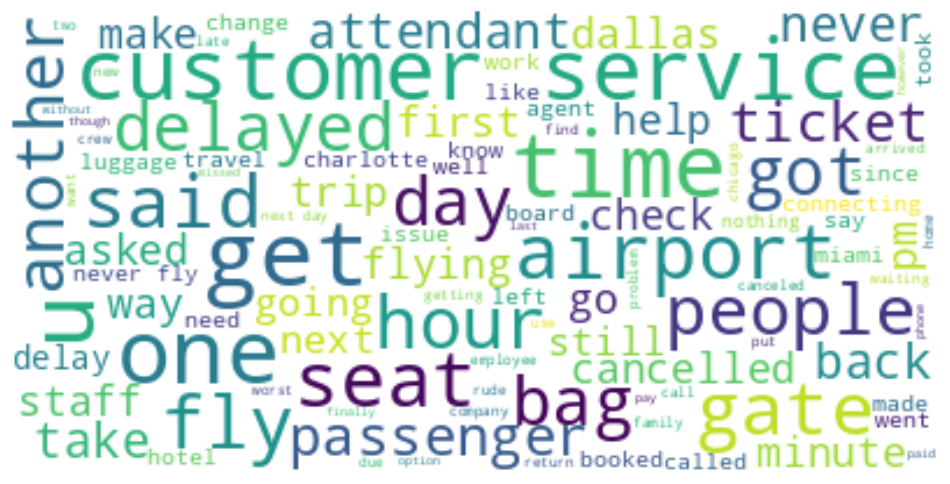

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df1.Lemma)
plt.figure(figsize=(12,12))

stopwords = set(stopwords.words('english'))
stopwords.update(["aa","flight", "american","Airlines", "airway","airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=200,width=400,max_font_size=40, max_words=100, stopwords=stopwords,background_color ='white').generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: >

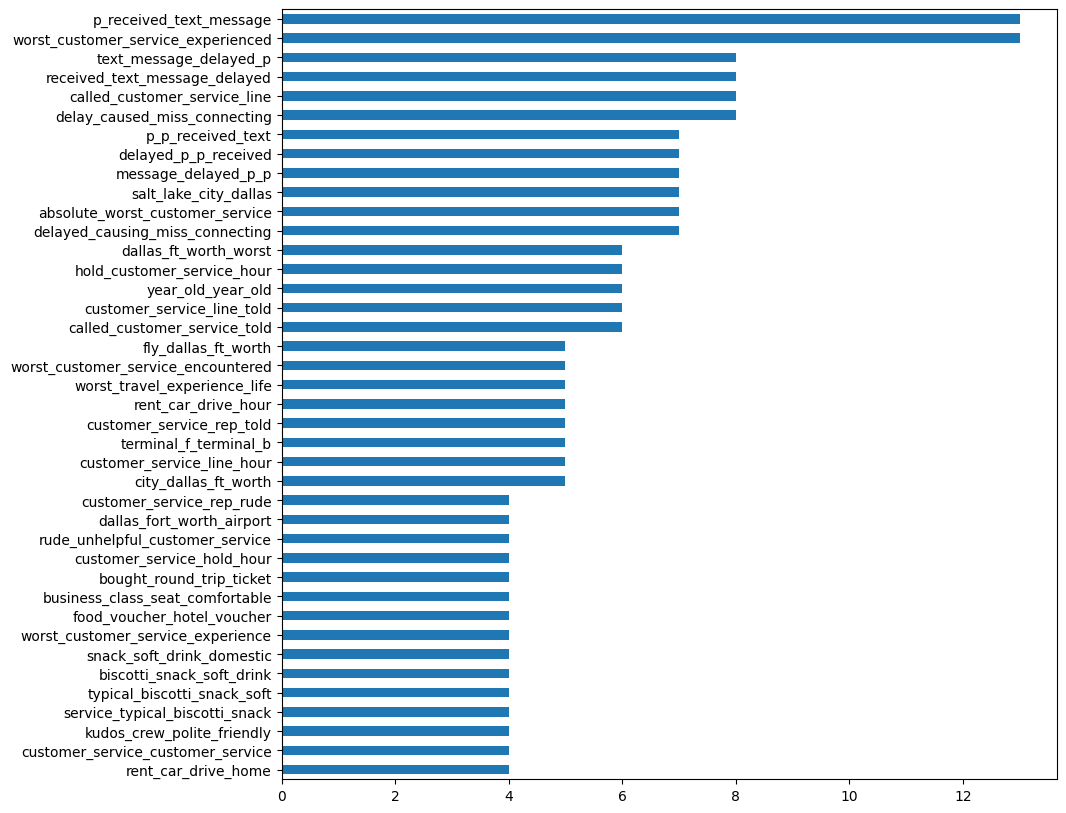

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from sklearn.feature_extraction import text
reviews = " ".join(df1.Lemma)

#split the text of all reviews into a list of words
words = reviews.split(" ")
#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'aa', "passenger","u", "said","airways","american","airline",\
                                           "hnl","plane","lhr","review"])
new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

In [ ]:
!pip install vaderSentiment

In [ ]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df1['Sentiment'] = df1['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df1['Analysis'] = df1['Sentiment'].apply(vader_analysis)
df1.head()

,reviews,stars,date,country,verified,Lemma,Sentiment,Analysis
0,Not Verified | My 21 year old daughter broke h...,2,2024-03-14,United States,False,year old daughter broke foot mission trip arli...,-0.5423,Negative
1,✅ Trip Verified | I’ve had several negative e...,1,2024-03-14,United States,True,several negative experience airline losing che...,-0.9042,Negative
2,✅ Trip Verified | They are the worst airline ...,3,2024-03-13,United States,True,worst airline countless delay u board pm plane...,-0.6249,Negative
3,Not Verified | A disaster from start to finish...,1,2024-03-13,United States,False,disaster start finish first flight columbia ch...,-0.8479,Negative
4,"✅ Trip Verified | Worst airline ever, it was ...",1,2024-03-13,United States,True,worst airline ever dirty staff rude never fly ...,-0.6527,Negative


In [ ]:
vader_counts = df1['Analysis'].value_counts()
vader_counts

Negative    2214
Positive     819
Neutral      467
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7c2af84deb30>,
 [Text(-0.4450036121984976, 1.005968083554488, 'Negative'),
  Text(-0.0029622814745623757, -1.0999960113057072, 'Positive'),
  Text(1.2331219172854557, -0.5494636813386684, 'Neutral')],
 [Text(-0.2427292430173623, 0.5487098637569934, '63.3%'),
  Text(-0.0016157898952158412, -0.5999978243485675, '23.4%'),
  Text(0.7764100960686203, -0.3459586141761986, '13.3%')])

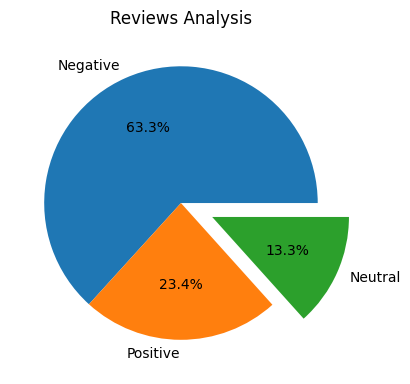

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)